# Creating Block Palettes with Glasbey

It is often useful to group categories together into groups and create a colour palette such that each group has different shades of a given colour, and distinct groups have shades of distinct colours. This can be done by gluing together discrtizations of continuous linear palettes -- but that still leaves the problem of selecting distinct linear palettes. The ``glasbey`` library provides a an easy way to create such palettes, using techniques from the paper [*Colour Displays for Categorical Images*](http://onlinelibrary.wiley.com/doi/10.1002/col.20327/abstract) by Glasbey, Heijden, Toh and Gray to provide visual distinctiveness between blocks. To demonstrate this in action we'll need to import the ``glasbey`` library, and to visualize the palettes we create we will use seaborn.

In [1]:
import glasbey
import seaborn as sns

sns.set()

To create a palette with blocks such that each block is built around a main colour, and distinct blocks have visually distinct colours we can call the ``create_block_palette`` function. The function has a single mandatory argument: a list of block sizes. For example, to create a block palette of twelve total colours in three blocks where each block has four colours we would call ``create_block_palette`` as follows:

In [2]:
glasbey.create_block_palette([4, 4, 4])

['#1f2500',
 '#0d6100',
 '#259834',
 '#66cd99',
 '#003f70',
 '#006dc4',
 '#2e9cff',
 '#c5cbff',
 '#4d001b',
 '#9f0f1e',
 '#de3b29',
 '#ff9640']

To see what this looks like we can visualize the resulting palette using seaborn's ``palplot`` function.

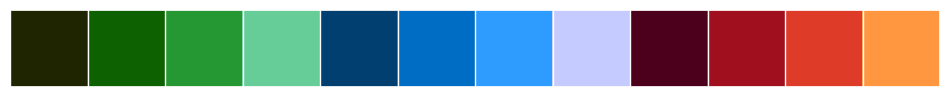

In [3]:
sns.palplot(glasbey.create_block_palette([4, 4, 4]))

An example of where such a palette might be useful is the well-known [20-newsgroups dataset](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html), a classic dataset for NLP problems. The dataset collects messages from twenty different newsgroups, with the usla problem being that of successfully predicting the newsgroup of messages. Visualizing the dataset is quite common (see [here](https://topometry.readthedocs.io/en/latest/20Newsgroups_Tutorial.html) and [here](https://umap-learn.readthedocs.io/en/latest/document_embedding.html) and [here](https://vectorizers.readthedocs.io/en/latest/document_vectorization.html) for some examples). The first problem is that it is rare to find palettes with 20 distinct colours. The second catch is that the newsgroups themselves have somewhat overlapping topics. We can group them as follows:

* **Computers**:
 * comp.graphics
 * comp.os.ms-windows.misc
 * comp.sys.ibm.pc.hardware
 * comp.sys.mac.hardware
 * comp.windows.x
* **Science**:
 * sci.crypt
 * sci.electronics
 * sci.med
 * sci.space
* **Politics**:
 * talk.politics.guns
 * talk.politics.mideast
 * talk.politics.misc
* **Religion**:
 * alt.atheism
 * soc.religion.christian
 * talk.religion.misc
* **Sports**:
 * rec.sports.baseball
 * rec.sports.hockey
* **Cars and motorcycles**:
 * rec.autos
 * rec.motorcycles
* **For Sale**:
 * misc.forsale

Ideally we would have a main colour for each group, and distinguish by variations of that colour within each group. The result would be a palette with blocks of various sizes etc. The ``create_block_palette`` is ideal for this as we simply hand it the various sizes of blocks we will need, and can then map the different newsgroups to colours in the relevant blocks. An example block palette for 20-newsgroups might be as follows:

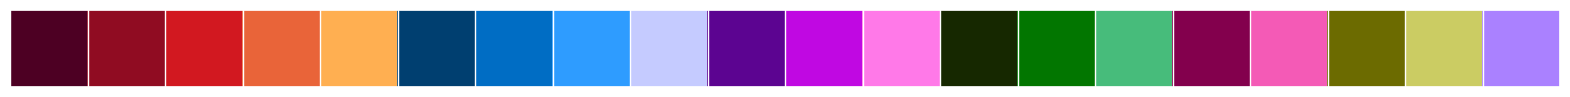

In [4]:
sns.palplot(glasbey.create_block_palette([5, 4, 3, 3, 2, 2, 1]))

As with the other ``glasbey`` functions there are a number of options to tweak and fine-tune  the aesthetic. For example we can vary how much hue and lightness variation we have within each block.

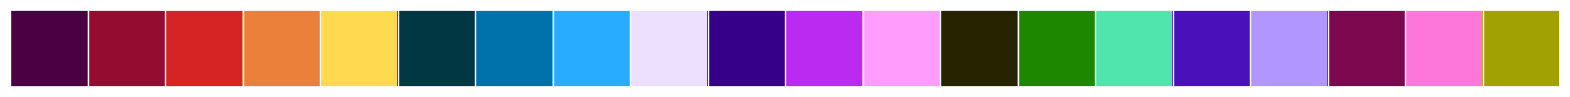

In [5]:
sns.palplot(
    glasbey.create_block_palette(
        [5, 4, 3, 3, 2, 2, 1], 
        hue_bend_scale=10.0, 
        max_hue_bend=80.0, 
        lightness_bend_scale=12.0, 
        max_lightness_bend=90.0
    )
)

Alternatively, by setting the ``hue_bend_scale`` to 0.0 we can force each block to keep the same hue value. Note how as we adjust the within block parameters the choice of base colour for different blocks varies, since it takes into account all the colours added to each block when generating the next block base colour.

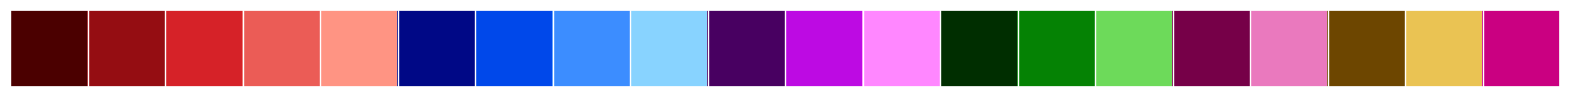

In [6]:
sns.palplot(
    glasbey.create_block_palette(
        [5, 4, 3, 3, 2, 2, 1], 
        hue_bend_scale=0.0, 
        lightness_bend_scale=12.0, 
        max_lightness_bend=90.0,
        chroma_bend_scale=0.0,
    )
)

There are a number of other options, including lightness and chroma bounds for the generated colours, and bounds on the lightness, chroma and hue of the within block colours. This makes it easy to tweak the created palette to meet your exact aesthetic needs realtively quickly and easily.

Another example of a good use case can be seen in the palette "Paired" from ColorBrewer. This is a popular palette, not least because it has twelve colours (more than many other pre-defined palettes) -- it also pairs up colours, with one light and one dark version of each colour in the palette... 

In [7]:
sns.color_palette("Paired", 12)

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

But that's only good if you have pairs of categories. Have you ever wanted a "Tripled" palette? We can easily generate a twelve colour palette with triples of each hue by simply specifying blocks of three (and we can always tweak aesthetics as above)

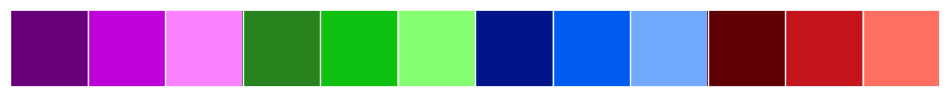

In [8]:
sns.palplot(glasbey.create_block_palette([3, 3, 3, 3], hue_bend_scale=0.0))

But why stop at twelve? We can just as easily generate a nice looking twenty-one colour palette based around triples...

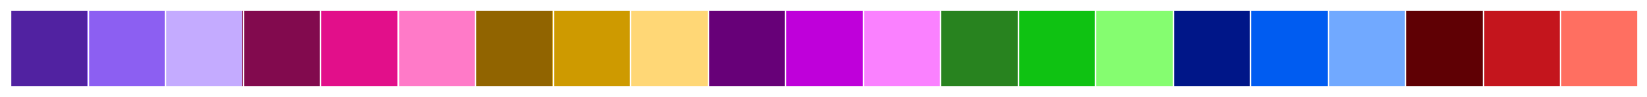

In [9]:
sns.palplot(glasbey.create_block_palette([3, 3, 3, 3, 3, 3, 3], hue_bend_scale=0.0))

Hopefully you can already think of some potential use-cases for block palettes in your own work -- and now you have the tools to easily build and tweak them yourself... or even create them on the fly as needed.